In [589]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.mlab as mlab

In [588]:
# the trial wavefunction is a BOND CENTERED GAUSSIAN. NOT product of 2 atom centered gaussians

def psi(coords,ions):
        return np.exp(-0.5*(np.dot(coords[0],coords[0]) + np.dot(coords[1],coords[1])))

def WaveFunction1_test1(wf):
    coords=np.array([[1.0,0.5,0.3],[-0.2,0.1,-0.1]])
    ions=np.array([[-0.7,0.0,0.0],[0.7,0.0,0.0]])
    if np.abs(wf(coords,ions)-0.496585)<1e-5:
        return True
    else:
        print(psi(coords,ions))
        print(np.abs(psi(coords,ions)-0.496585))
        return False

# Lap(Psi)/Psi
def LapPsioverPsi(wf,coords,ions):
    d = 0.001
    wf_ref = wf(coords,ions)
    
    coords_plus=np.zeros((2,3),float)
    coords_minus=np.zeros((2,3),float)
    
    #x1
    coords_plus[:]=coords
    coords_minus[:]=coords
    coords_plus[0][0]=coords_plus[0][0] + d
    coords_minus[0][0]=coords_minus[0][0] - d
    lapx1 = (wf(coords_plus,ions) + wf(coords_minus,ions) -2*wf_ref)/(d**2)
    
    #y1
    coords_plus[:]=coords
    coords_minus[:]=coords
    coords_plus[0][1]=coords_plus[0][1] + d
    coords_minus[0][1]=coords_minus[0][1] - d
    lapy1 = (wf(coords_plus,ions) + wf(coords_minus,ions) -2*wf_ref)/(d**2)
    
    #z1
    coords_plus[:]=coords
    coords_minus[:]=coords
    coords_plus[0][2]=coords_plus[0][2] + d
    coords_minus[0][2]=coords_minus[0][2] - d
    lapz1 = (wf(coords_plus,ions) + wf(coords_minus,ions) -2*wf_ref)/(d**2)
    
    #x2
    coords_plus[:]=coords
    coords_minus[:]=coords
    coords_plus[1][0]=coords_plus[1][0] + d
    coords_minus[1][0]=coords_minus[1][0] - d
    lapx2 = (wf(coords_plus,ions) + wf(coords_minus,ions) -2*wf_ref)/(d**2)
    
    #y2
    coords_plus[:]=coords
    coords_minus[:]=coords
    coords_plus[1][1]=coords_plus[1][1] + d
    coords_minus[1][1]=coords_minus[1][1] - d
    lapy2 = (wf(coords_plus,ions) + wf(coords_minus,ions) -2*wf_ref)/(d**2)
    
    #z2
    coords_plus[:]=coords
    coords_minus[:]=coords
    coords_plus[1][2]=coords_plus[1][2] + d
    coords_minus[1][2]=coords_minus[1][2] - d
    lapz2 = (wf(coords_plus,ions) + wf(coords_minus,ions) -2*wf_ref)/(d**2)
    
    lap = lapx1 + lapy1 +lapz1 +lapx2 +lapy2 +lapz2
    
    return -0.5/wf(coords,ions)*(lapx1 + lapy1 +lapz1 +lapx2 +lapy2 +lapz2)


# (KE+V)Psi/Psi
def LocalEnergy(wf,coords,ions):
    return LapPsioverPsi(wf,coords,ions) - (1/math.sqrt(np.dot(coords[0] - ions[0],coords[0] - ions[0])) + 1/math.sqrt(np.dot(coords[0] - ions[1],coords[0] - ions[1])) + 1/math.sqrt(np.dot(coords[1] - ions[0],coords[1] - ions[0])) + 1/math.sqrt(np.dot(coords[1] - ions[1],coords[1] - ions[1]))) + 1/math.sqrt(np.dot(coords[0] - coords[1],coords[0] - coords[1])) + 1/math.sqrt(np.dot(ions[0] - ions[1],ions[0] - ions[1]))

ions=np.array([[-0.7,0.0,0.0],[0.7,0.0,0.0]])
coords=np.array([[1.0,0.3,0.2],[2.0,-0.2,0.1]])

E = LocalEnergy(psi,coords,ions)
print(E)

if (WaveFunction1_test1(psi)):
    print("Wavefunction Test passed")
else:
    print ("Wavefunction Test Failed")

-1.8194909218425162
Wavefunction Test passed


In [462]:
# qmc function
def VMC(wf,coords_ini,ions,Nsteps):
    # calculating intial |\psi|
    wf_current = wf(coords_ini,ions)
    print('initial wavefunction:',wf_current)
    coords_proposed = np.zeros((2,3),float)
    coords_current = coords_ini
    scale = 1
    updates = 0
    no_updates = 0
    for step in range(Nsteps):
        R = np.random.uniform(-1,1,(2,3))
        coords_proposed[0] = coords_current[0] + scale*R[0]
        coords_proposed[1] = coords_current[1] + scale*R[1]
        wf_proposed = wf(coords_proposed,ions)
        weight = wf_proposed**2/wf_current**2
        #print('weight:',weight)
        if weight > np.random.rand():
            updates = updates + 1
            wf_current = wf_proposed
            coords_current[:] = coords_proposed
        else:
            no_updates = no_updates + 1
        #e1x[step]=coords_current[0][0]
        #e2x[step]=coords_current[1][0]
        E[step] = LocalEnergy(wf,coords_current,ions)
    print('Acceptance Ratio:',updates/Nsteps)

Nsteps=100000
E=np.zeros(Nsteps)
#e1x=np.zeros(Nsteps)
#e2x=np.zeros(Nsteps)

coords=np.array([[1.0,0.5,0.3],[-0.2,0.1,-0.1]])
ions=np.array([[-0.7,0.0,0.0],[0.7,0.0,0.0]])
VMC(psi,coords,ions,Nsteps)

initial wavefunction: 0.49658530379140947
Acceptance Ratio: 0.33442


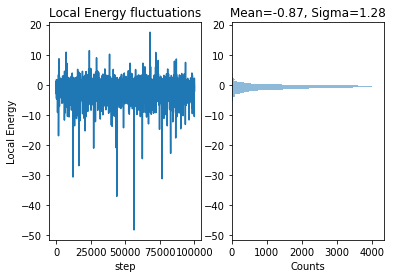

In [463]:
# plot of local energy

(mean,sigma)=norm.fit(E)

plt.figure()
plt.subplot(1,2,1)
plt.plot(np.linspace(1,Nsteps,Nsteps),E)
plt.xlabel('step')
plt.ylabel('Local Energy')
plt.title('Local Energy fluctuations')
plt.subplot(1,2,2)
plt.hist(E,bins=1000,orientation=u'horizontal',alpha = 0.5);
plt.xlabel('Counts')
plt.title('Mean=%4.2f' %mean + ', Sigma=%4.2f' %sigma)
plt.show()

In [590]:
# same exact thing as above just utilizing classes

class WaveFunction:
    def psi(self,coords):
        return np.exp(-WaveFunction.Alpha*(np.dot(coords[0],coords[0]) + np.dot(coords[1],coords[1])))
    
    def LapPsioverPsi(self,coords):
        d = 0.001
        wf_ref = WaveFunction.psi(self,coords)
    
        coords_plus=np.zeros((2,3),float)
        coords_minus=np.zeros((2,3),float)
    
        #x1
        coords_plus[:]=coords
        coords_minus[:]=coords
        coords_plus[0][0]=coords_plus[0][0] + d
        coords_minus[0][0]=coords_minus[0][0] - d
        lapx1 = (WaveFunction.psi(self,coords_plus) + WaveFunction.psi(self,coords_minus) -2*wf_ref)/(d**2)
    
        #y1
        coords_plus[:]=coords
        coords_minus[:]=coords
        coords_plus[0][1]=coords_plus[0][1] + d
        coords_minus[0][1]=coords_minus[0][1] - d
        lapy1 = (WaveFunction.psi(self,coords_plus) + WaveFunction.psi(self,coords_minus) -2*wf_ref)/(d**2)
    
        #z1
        coords_plus[:]=coords
        coords_minus[:]=coords
        coords_plus[0][2]=coords_plus[0][2] + d
        coords_minus[0][2]=coords_minus[0][2] - d
        lapz1 = (WaveFunction.psi(self,coords_plus) + WaveFunction.psi(self,coords_minus) -2*wf_ref)/(d**2)
    
        #x2
        coords_plus[:]=coords
        coords_minus[:]=coords
        coords_plus[1][0]=coords_plus[1][0] + d
        coords_minus[1][0]=coords_minus[1][0] - d
        lapx2 = (WaveFunction.psi(self,coords_plus) + WaveFunction.psi(self,coords_minus) -2*wf_ref)/(d**2)
    
        #y2
        coords_plus[:]=coords
        coords_minus[:]=coords
        coords_plus[1][1]=coords_plus[1][1] + d
        coords_minus[1][1]=coords_minus[1][1] - d
        lapy2 = (WaveFunction.psi(self,coords_plus) + WaveFunction.psi(self,coords_minus) -2*wf_ref)/(d**2)
    
        #z2
        coords_plus[:]=coords
        coords_minus[:]=coords
        coords_plus[1][2]=coords_plus[1][2] + d
        coords_minus[1][2]=coords_minus[1][2] - d
        lapz2 = (WaveFunction.psi(self,coords_plus) + WaveFunction.psi(self,coords_minus) -2*wf_ref)/(d**2)
    
        lap = lapx1 + lapy1 +lapz1 +lapx2 +lapy2 +lapz2
    
        return -0.5/WaveFunction.psi(self,coords)*(lapx1 + lapy1 +lapz1 +lapx2 +lapy2 +lapz2)
    
    def LocalEnergy(self,coords):
        return WaveFunction.LapPsioverPsi(self,coords) - (1/math.sqrt(np.dot(coords[0] - WaveFunction.Ions[0],coords[0] - WaveFunction.Ions[0])) + 1/math.sqrt(np.dot(coords[0] - WaveFunction.Ions[1],coords[0] - WaveFunction.Ions[1])) + 1/math.sqrt(np.dot(coords[1] - WaveFunction.Ions[0],coords[1] - WaveFunction.Ions[0])) + 1/math.sqrt(np.dot(coords[1] - WaveFunction.Ions[1],coords[1] - WaveFunction.Ions[1]))) + 1/math.sqrt(np.dot(coords[0] - coords[1],coords[0] - coords[1])) + 1/math.sqrt(np.dot(WaveFunction.Ions[0] - WaveFunction.Ions[1],WaveFunction.Ions[0] - WaveFunction.Ions[1]))
    
    def SetIons(self,ions):
        WaveFunction.Ions = ions
    
    def SetAlpha(self,alpha):
        WaveFunction.Alpha = alpha


In [591]:
# testing class / initializing WaveFunction object wf

wf = WaveFunction()
wf.SetIons(np.array([[0.7,0.0,0.0],[-0.7,0.0,0.0]]))
wf.Ions
wf.SetAlpha(0.5)
wf.Alpha
wf.psi(np.array([[1.0,0.5,0.3],[-0.2,0.1,-0.1]]))
R=np.zeros((2,3),float)
R[0]=[1.0,0.3,0.2]
R[1]=[2.0,-0.2,0.1]
wf.LocalEnergy(R)

-1.8194909218425166

In [592]:
# qmc function rewritten for WaveFunction class input

def VMC(wfobject,Nsteps):
    # calculating intial |\psi|
    E=np.zeros(Nsteps)
    coords_ini = np.random.uniform(-1,1,(2,3)) #np.array([[1.0,0.5,0.3],[-0.2,0.1,-0.1]])
    wf_current = wfobject.psi(coords_ini)
    #print('initial wavefunction:',wf_current)
    coords_proposed = np.zeros((2,3),float)
    coords_current = coords_ini
    scale = 1
    updates = 0
    no_updates = 0
    for step in range(Nsteps):
        R = np.random.uniform(-1,1,(2,3))
        coords_proposed[0] = coords_current[0] + scale*R[0]
        coords_proposed[1] = coords_current[1] + scale*R[1]
        wf_proposed = wfobject.psi(coords_proposed)
        weight = wf_proposed**2/wf_current**2
        #print('weight:',weight)
        if weight > np.random.rand():
            updates = updates + 1
            wf_current = wf_proposed
            coords_current[:] = coords_proposed
        else:
            no_updates = no_updates + 1
        #e1x[step]=coords_current[0][0]
        #e2x[step]=coords_current[1][0]
        E[step] = wfobject.LocalEnergy(coords_current)
    print('Acceptance Ratio:',updates/Nsteps)
    return E


In [593]:
# initializing wf object and running qmc

N = 100000

wf = WaveFunction()
wf.SetIons(np.array([[0.7,0.0,0.0],[-0.7,0.0,0.0]]))
wf.SetAlpha(0.3)

Elist = VMC(wf,N)

(mean,sigma)=norm.fit(Elist)

Acceptance Ratio: 0.45278


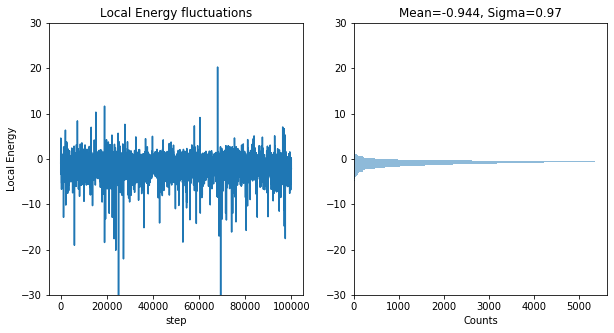

In [603]:
# plotting above qmc run

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(np.linspace(1,N,N),Elist)
plt.xlabel('step')
plt.ylabel('Local Energy')
plt.ylim(-30,30)
plt.title('Local Energy fluctuations')
plt.subplot(1,2,2)
plt.hist(Elist,bins=1000,orientation=u'horizontal',alpha = 0.5);
plt.xlabel('Counts')
plt.ylim(-30,30)
plt.title('Mean=%4.3f' %mean + ', Sigma=%4.2f' %sigma)
plt.show()

In [635]:
# now do for varying alpha

def Optimize(wfobject):
    optimizeList=[]
    cent=wfobject.Alpha
    # let's cover a range of +/- 0.2 around initial alpha, removing negative values if appear.
    N=50000 ; trash=2000 ; pm=0.2 ; num=20 ; hi=cent+pm ; lo=cent-pm
    forerror= 1/math.sqrt(N)
    # For the sake of time, let's limit how many alpha's are done. So the range determines the increment
    a=np.linspace(lo,hi,num)
    for i in a:
        wfobject.SetAlpha(i)
        print('Running',wfobject.Alpha)
        Elist=VMC(wfobject,N)
        (mean,sigma)=norm.fit(Elist[trash:N-1])
        optimizeList.append([wfobject.Alpha,mean,sigma*forerror])
    bestEntry=min(optimizeList,key=lambda x: x[1])
    bestAlpha=bestEntry[0]
    print('Best alpha:',bestEntry)
    return (np.array(optimizeList),bestAlpha)

Running 0.09999999999999998
Acceptance Ratio: 0.6602
Running 0.12105263157894734
Acceptance Ratio: 0.63094
Running 0.1421052631578947
Acceptance Ratio: 0.60656
Running 0.16315789473684209
Acceptance Ratio: 0.57672
Running 0.18421052631578944
Acceptance Ratio: 0.5512
Running 0.20526315789473681
Acceptance Ratio: 0.52938
Running 0.2263157894736842
Acceptance Ratio: 0.51192
Running 0.24736842105263154
Acceptance Ratio: 0.49606
Running 0.2684210526315789
Acceptance Ratio: 0.47168
Running 0.2894736842105263
Acceptance Ratio: 0.45814
Running 0.31052631578947365
Acceptance Ratio: 0.44208
Running 0.33157894736842103
Acceptance Ratio: 0.42854
Running 0.3526315789473684
Acceptance Ratio: 0.41528
Running 0.3736842105263158
Acceptance Ratio: 0.40104
Running 0.3947368421052631
Acceptance Ratio: 0.39048
Running 0.4157894736842105
Acceptance Ratio: 0.37866
Running 0.43684210526315786
Acceptance Ratio: 0.36756
Running 0.45789473684210524
Acceptance Ratio: 0.35298
Running 0.4789473684210526
Acceptance 

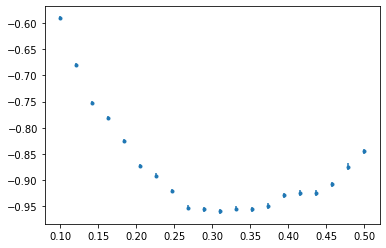

In [583]:
# test optimize, initialize wf object

wf = WaveFunction()
wf.SetIons(np.array([[0.7,0.0,0.0],[-0.7,0.0,0.0]]))
wf.SetAlpha(0.3)

(data,bAlpha) = Optimize(wf)


plt.errorbar(data[:,0],data[:,1],data[:,2],fmt='.')
plt.show()

In [675]:
# same exact thing, better class initiation, useful if want to parallelize

class WaveFunction:
    def __init__(self,ions,alpha):
        self.Ions=ions
        self.Alpha=alpha
    
    def psi(self,coords):
        return np.exp(-self.Alpha*(np.dot(coords[0],coords[0]) + np.dot(coords[1],coords[1])))
    
    def LapPsioverPsi(self,coords):
        d = 0.001
        wf_ref = WaveFunction.psi(self,coords)
    
        coords_plus=np.zeros((2,3),float)
        coords_minus=np.zeros((2,3),float)
    
        #x1
        coords_plus[:]=coords
        coords_minus[:]=coords
        coords_plus[0][0]=coords_plus[0][0] + d
        coords_minus[0][0]=coords_minus[0][0] - d
        lapx1 = (WaveFunction.psi(self,coords_plus) + WaveFunction.psi(self,coords_minus) -2*wf_ref)/(d**2)
    
        #y1
        coords_plus[:]=coords
        coords_minus[:]=coords
        coords_plus[0][1]=coords_plus[0][1] + d
        coords_minus[0][1]=coords_minus[0][1] - d
        lapy1 = (WaveFunction.psi(self,coords_plus) + WaveFunction.psi(self,coords_minus) -2*wf_ref)/(d**2)
    
        #z1
        coords_plus[:]=coords
        coords_minus[:]=coords
        coords_plus[0][2]=coords_plus[0][2] + d
        coords_minus[0][2]=coords_minus[0][2] - d
        lapz1 = (WaveFunction.psi(self,coords_plus) + WaveFunction.psi(self,coords_minus) -2*wf_ref)/(d**2)
    
        #x2
        coords_plus[:]=coords
        coords_minus[:]=coords
        coords_plus[1][0]=coords_plus[1][0] + d
        coords_minus[1][0]=coords_minus[1][0] - d
        lapx2 = (WaveFunction.psi(self,coords_plus) + WaveFunction.psi(self,coords_minus) -2*wf_ref)/(d**2)
    
        #y2
        coords_plus[:]=coords
        coords_minus[:]=coords
        coords_plus[1][1]=coords_plus[1][1] + d
        coords_minus[1][1]=coords_minus[1][1] - d
        lapy2 = (WaveFunction.psi(self,coords_plus) + WaveFunction.psi(self,coords_minus) -2*wf_ref)/(d**2)
    
        #z2
        coords_plus[:]=coords
        coords_minus[:]=coords
        coords_plus[1][2]=coords_plus[1][2] + d
        coords_minus[1][2]=coords_minus[1][2] - d
        lapz2 = (WaveFunction.psi(self,coords_plus) + WaveFunction.psi(self,coords_minus) -2*wf_ref)/(d**2)
    
        lap = lapx1 + lapy1 +lapz1 +lapx2 +lapy2 +lapz2
    
        return -0.5/WaveFunction.psi(self,coords)*(lapx1 + lapy1 +lapz1 +lapx2 +lapy2 +lapz2)
    
    def LocalEnergy(self,coords):
        return WaveFunction.LapPsioverPsi(self,coords) - (1/math.sqrt(np.dot(coords[0] - self.Ions[0],coords[0] - self.Ions[0])) + 1/math.sqrt(np.dot(coords[0] - self.Ions[1],coords[0] - self.Ions[1])) + 1/math.sqrt(np.dot(coords[1] - self.Ions[0],coords[1] - self.Ions[0])) + 1/math.sqrt(np.dot(coords[1] - self.Ions[1],coords[1] - self.Ions[1]))) + 1/math.sqrt(np.dot(coords[0] - coords[1],coords[0] - coords[1])) + 1/math.sqrt(np.dot(self.Ions[0] - self.Ions[1],self.Ions[0] - self.Ions[1]))


In [673]:
# let's try to parallelize the above optimize function since all alpha calculations are independent

import time
import multiprocessing as mp

def Optimize(wfobject,q):
    #start=time.time()
    time.sleep(2)
    #print("--- %s seconds ---" % (time.time() - start))
    #optimizeList=[]
    #cent=wfobject.Alpha
    # let's cover a range of +/- 0.2 around initial alpha, removing negative values if appear.
    N=50000 ; trash=2000 ; #pm=0.2 ; num=20 ; hi=cent+pm ; lo=cent-pm
    forerror= 1/math.sqrt(N)
    # For the sake of time, let's limit how many alpha's are done. So the range determines the increment
    #a=np.linspace(lo,hi,num)
    #print('Running',wfobject.Alpha)
    Elist=VMC(wfobject,N)
    (mean,sigma)=norm.fit(Elist[trash:N-1])
    optimizeList=[wfobject.Alpha,mean,sigma*forerror]
    print(optimizeList)
    #bestEntry=min(optimizeList,key=lambda x: x[1])
    #bestAlpha=bestEntry[0]
    #print('Best alpha:',bestEntry)
    q.put(np.array(optimizeList))
    #wfobject.value=np.array(optimizeList)

# wf objects
ions=np.array([[0.7,0.0,0.0],[-0.7,0.0,0.0]])

wf1 = WaveFunction(ions,0.1)
wf2 = WaveFunction(ions,0.2)
wf3 = WaveFunction(ions,0.3)
wf4 = WaveFunction(ions,0.4)
wf5 = WaveFunction(ions,0.5)
wf6 = WaveFunction(ions,0.6)
wf7 = WaveFunction(ions,0.7)

wfs = [wf1,wf2,wf3,wf4,wf5,wf6,wf7]

# using pool

#pool = mp.Pool(mp.cpu_count())
#data = [pool.apply(Optimize, args=(wfs[i])) for i in range(len(wfs))]
#pool.close()

if __name__ == '__main__':
    starttime = time.time()
    q = multiprocessing.Queue()
    #manager = multiprocessing.Manager()
    #return_list = manager.list()
    processes = []
    data=[]
    for wf in wfs:
        
        p = mp.Process(target=Optimize, args=(wf,q,))
        processes.append(p)
        p.start()
        #print(p)
        data.append(q.get())
        print("--- %s seconds ---" % (time.time() - starttime))
    
    #data = []
    #data.update(q.get())
    #print(data)
    #print("--- %s seconds ---" % (time.time() - starttime))
    
    for process in processes:
        process.join()
     #optimizeArray = np.array(return_list)
    print("--- %s seconds ---" % (time.time() - starttime))

--- 2.0002522468566895 seconds ---
Acceptance Ratio: 0.66422
[0.1, -0.5937370079889537, 0.0030656949877408634]
--- 12.031688451766968 seconds ---
--- 2.0001792907714844 seconds ---
Acceptance Ratio: 0.53826
[0.2, -0.8586955842406347, 0.0036826444044726634]
--- 23.826478242874146 seconds ---
--- 2.00124454498291 seconds ---
Acceptance Ratio: 0.45444
[0.3, -0.9361494724085977, 0.004158384298757887]
--- 35.77039098739624 seconds ---
--- 2.001100778579712 seconds ---
Acceptance Ratio: 0.39022
[0.4, -0.9375441932293445, 0.004901431081111178]
--- 47.67280912399292 seconds ---
--- 2.0003130435943604 seconds ---
Acceptance Ratio: 0.33766
[0.5, -0.8622126374988441, 0.005320084034056218]
--- 59.774474143981934 seconds ---
--- 2.000551223754883 seconds ---
Acceptance Ratio: 0.29394
[0.6, -0.7380600849304026, 0.0060676853835765305]
--- 71.51752710342407 seconds ---
--- 2.0003368854522705 seconds ---
Acceptance Ratio: 0.26054
[0.7, -0.6076545898475695, 0.00871028005505304]
--- 83.58044123649597 sec

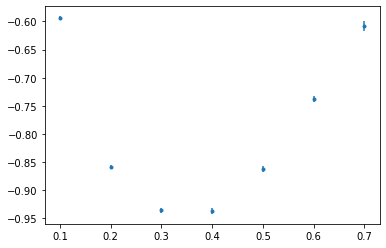

In [674]:
# plotting energy for different alpha's using the 'parallel' function. N = 50000 for each simulation

optimizeArray=np.array(data)
plt.errorbar(optimizeArray[:,0],optimizeArray[:,1],optimizeArray[:,2],fmt='.')
#plt.errorbar(data[:,0],data[:,1],data[:,2],fmt='.')
plt.show()
#print(data)
#print("Number of cpu : ", multiprocessing.cpu_count())

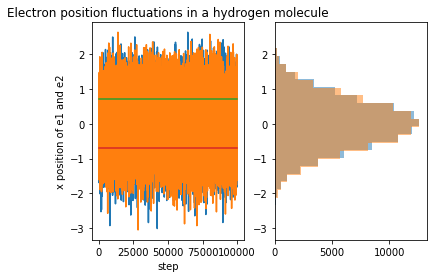

In [393]:
# old, looking at average position along bond direction

plt.figure()
plt.subplot(1,2,1)
plt.plot(np.linspace(1,Nsteps,Nsteps),e1x)
plt.plot(np.linspace(1,Nsteps,Nsteps),e2x)
plt.plot([0,Nsteps],[0.7,0.7])
plt.plot([0,Nsteps],[-0.7,-0.7])
plt.xlabel('step')
plt.ylabel('x position of e1 and e2')
plt.title('Electron position fluctuations in a hydrogen molecule')
plt.subplot(1,2,2)
#(mu,sigma)=norm.fit(e1x)
#gauss_fit = norm.pdf(25, mu, sigma)
#plt.plot(25,gauss_fit)
plt.hist(e1x,bins=25,orientation=u'horizontal',alpha = 0.5);
#(mu,sigma)=norm.fit(e2x)
plt.hist(e2x,bins=25,orientation=u'horizontal',alpha = 0.5);

In [173]:
# solving differential equations, using Monte Carlo to perform integrations
def mc_int(func, domain, n_samples):
    samples = np.random.uniform(low=domain[0], high=domain[1], size=(n_samples))
    volume = abs(domain[1] - domain[0])
    return np.mean(func(samples)) * volume

In [21]:
def mc_solver(func, y0, x, n_samples):
    vals = [y0]
    for lo, hi in zip(x[:-1], x[1:]):
        vals.append(vals[-1] + mc_int(func, (lo, hi), n_samples))
    return np.asarray(vals)


In [42]:
def f(x):
    return x**3 + 2 * x**2 - 3**x

In [466]:
c=np.linspace(-5,5,30)
y=mc_solver(f,10,c,100)

Text(0, 0.5, 'y')

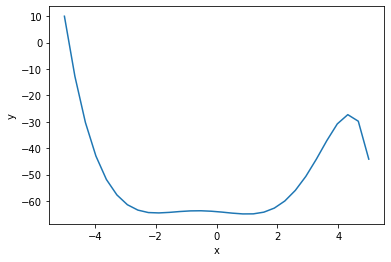

In [467]:
plt.figure()
plt.plot(c,y)
plt.xlabel('x')
plt.ylabel('y')
#plt.title('Energy fluctuations in an MH trajectory')